In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('demo').getOrCreate()

In [3]:
df=spark.read.csv("bank_segdata.csv",inferSchema=True,header=True)
df.show(3)

+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|          T1|  C5841053| 10-01-1994|         F|  JAMSHEDPUR|          17819.05|     02-08-2016|         143207|             25.0|null|
|          T2|  C2142763| 04-04-1957|         M|     JHAJJAR|           2270.69|     02-08-2016|         141858|          27999.0|null|
|          T3|  C4417068| 26-11-1996|         F|      MUMBAI|          17874.44|     02-08-2016|         142712|            459.0|null|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
only showing top 3 rows



In [4]:
type(df)

pyspark.sql.dataframe.DataFrame

In [5]:
df.count()

2006

In [8]:
df.take(3)

[Row(TransctionID='T1', CustomerID='C5841053', CustomerDOB='10-01-1994', CustGender='F', CustLocation='JAMSHEDPUR', CustAccountBalance=17819.05, TransactionDate='02-08-2016', TransactionTime=143207, TransactionAmount=25.0, _c9=None),
 Row(TransctionID='T2', CustomerID='C2142763', CustomerDOB='04-04-1957', CustGender='M', CustLocation='JHAJJAR', CustAccountBalance=2270.69, TransactionDate='02-08-2016', TransactionTime=141858, TransactionAmount=27999.0, _c9=None),
 Row(TransctionID='T3', CustomerID='C4417068', CustomerDOB='26-11-1996', CustGender='F', CustLocation='MUMBAI', CustAccountBalance=17874.44, TransactionDate='02-08-2016', TransactionTime=142712, TransactionAmount=459.0, _c9=None)]

In [57]:
# myfunc = spark.read.csv("bank_segdata.csv", inferSchema=True, header=True)
# df = myfunc.limit(5) # limit to only show first 3 rows
# df.show()

# # # Convert DataFrame to RDD
# # rdd = df.rdd
# # rdd.collect() # Collect and print all elements in the RDD


In [1]:
# # Convert DataFrame to RDD
# rdd = df.rdd
# rdd.collect() # Collect and print all elements in the RDD

In [2]:
#raw_content = spark.sparkContext.textFile("bank_segdata.csv")


In [4]:
#type(raw_content)

In [5]:
#raw_content.count()

In [6]:
#raw_content.take(5)

In [7]:
#raw_content.takeSample(True, 5, 3)

In [8]:
# content = raw_content.map(lambda x: x.split(','))
# content.take(3)

In [9]:
# def clean(x):
#         return([xx.replace('', "") for xx in x])

In [10]:
#content = content.map(clean)

In [11]:
#content.take(4)

In [12]:
#package_count = content.map(lambda x: (x[6], 1)).reduceByKey(lambda a,b: a+b)

In [13]:
#type(package_count)

In [14]:
#package_count.count()

In [15]:
#package_count.take(5)

In [16]:
#package_count_2 = content.map(lambda x: (x[6], 1)).countByKey()

In [17]:
#type(package_count_2)

In [4]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *


In [5]:
df = spark.read.csv("bank_segdata.csv", inferSchema = True, header = True)

In [37]:
df.printSchema()

root
 |-- TransctionID: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- CustomerDOB: string (nullable = true)
 |-- CustGender: string (nullable = true)
 |-- CustLocation: string (nullable = true)
 |-- CustAccountBalance: double (nullable = true)
 |-- TransactionDate: string (nullable = true)
 |-- TransactionTime: integer (nullable = true)
 |-- TransactionAmount: double (nullable = true)
 |-- _c9: string (nullable = true)



In [25]:
df.show(5)

+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|          T1|  C5841053| 10-01-1994|         F|  JAMSHEDPUR|          17819.05|     02-08-2016|         143207|             25.0|null|
|          T2|  C2142763| 04-04-1957|         M|     JHAJJAR|           2270.69|     02-08-2016|         141858|          27999.0|null|
|          T3|  C4417068| 26-11-1996|         F|      MUMBAI|          17874.44|     02-08-2016|         142712|            459.0|null|
|          T4|  C5342380| 14-09-1973|         F|      MUMBAI|         866503.21|     02-08-2016|         142714|           2060.0|null|
|          T5|  C9031234| 24-03-1988|         F|

In [26]:
len(df.columns)

10

In [27]:
df.count()

2006

In [58]:

df.distinct().count()

2006

In [29]:

df.groupBy("CustomerId").count().orderBy("count", ascending = False).show()

+----------+-----+
|CustomerId|count|
+----------+-----+
|  C1841937|    2|
|  C8732711|    1|
|  C6421261|    1|
|  C2939112|    1|
|  C8741166|    1|
|  C4440931|    1|
|  C8116854|    1|
|  C4029960|    1|
|  C7817677|    1|
|  C4240562|    1|
|  C2221420|    1|
|  C8524541|    1|
|  C8017865|    1|
|  C1021343|    1|
|  C4814390|    1|
|  C7330163|    1|
|  C8640163|    1|
|  C4127485|    1|
|  C2440683|    1|
|  C7034179|    1|
+----------+-----+
only showing top 20 rows



In [8]:
#
df.filter(df["CustAccountBalance"]<"500").show()

+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|         T23|  C7018081|   1/1/1800|         M|WAYS PANCHKUVA AH...|            143.07|     03-08-2016|         104718|            110.0|null|
|         T27|  C5430368| 01-02-1986|         M|               DELHI|            285.76|     03-08-2016|         160537|           5500.0|null|
|         T35|  C7017047| 23-04-1977|         M|             GURGAON|             39.73|     03-08-2016|         182715|            110.0|null|
|         T37|  C4320949| 25-10-1984|         F|             CHENNAI|            213.06|     03-08-2016|         182915|           1081.

In [39]:
#
df.filter(df["TransactionAmount"] >50000).select("CustomerID").show()



+----------+
|CustomerID|
+----------+
|  C4325361|
|  C7675278|
|  C8738676|
|  C6784890|
|  C6629680|
|  C1631481|
|  C3414431|
|  C5874370|
|  C7814446|
|  C7729224|
|  C5830361|
+----------+



In [33]:
#
df.select("CustGender").distinct().show()

+----------+
|CustGender|
+----------+
|         F|
|      null|
|         M|
+----------+



In [9]:
#1 customer who is having balance more than 500 and 50000 
df.filter((df["CustAccountBalance"]>500) & (df["TransactionAmount"]<50000)).count()

1838

In [37]:
#2 Female customers average account balance
df.filter(df["CustGender"] == "F").selectExpr("avg(CustAccountBalance)").show()

+-----------------------+
|avg(CustAccountBalance)|
+-----------------------+
|     105321.79597122302|
+-----------------------+



In [45]:
#3 Female Customers who are from chennai
df.filter((df["CustGender"]=="F") & (df["CustLocation"]=="CHENNAI")).show()

+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|         T37|  C4320949| 25-10-1984|         F|     CHENNAI|            213.06|     03-08-2016|         182915|           1081.0|null|
|         T87|  C5931634| 15-08-1995|         F|     CHENNAI|           1942.83|     06-08-2016|         121618|             28.0|null|
|        T213|  C8426486| 01-07-1989|         F|     CHENNAI|          13279.12|     07-08-2016|         193120|           323.72|null|
|        T294|  C7058034| 06-03-1992|         F|     CHENNAI|         184680.72|     21-10-2016|         150915|             50.0|null|
|        T315|  C4637288| 25-10-1993|         F|

In [32]:
#4
#Find the total transaction amount for each customer according to gender

df.groupBy("CustGender").agg(sum("TransactionAmount").alias("total_transaction_amount")).show()


+----------+------------------------+
|CustGender|total_transaction_amount|
+----------+------------------------+
|         F|       877278.5199999997|
|      null|                  3449.0|
|         M|      2855457.6599999988|
+----------+------------------------+



In [66]:
#5
#PySpark to find the highest transaction amount made in Mumbai on each transaction date in a DataFrame.
from pyspark.sql.functions import max

highest_transactions = df.filter(df["CustLocation"] == "MUMBAI") \
                         .groupBy("TransactionDate") \
                         .agg(max("TransactionAmount").alias("HighestTransactionAmount"))

highest_transactions.show()



+---------------+------------------------+
|TransactionDate|HighestTransactionAmount|
+---------------+------------------------+
|     05-08-2016|                   519.0|
|     09-08-2016|                   599.0|
|     01-08-2016|                 1423.11|
|     07-08-2016|                   127.8|
|     03-08-2016|                  6800.0|
|     04-08-2016|                 10885.0|
|     21-10-2016|                 23352.0|
|     12-08-2016|                   500.0|
|     02-08-2016|                  2060.0|
|     06-08-2016|                  787.98|
+---------------+------------------------+



In [5]:
#6
#Show the average transaction amount:
df.select("TransactionAmount").agg({"TransactionAmount": "avg"}).show()


+----------------------+
|avg(TransactionAmount)|
+----------------------+
|     1862.505074775673|
+----------------------+



In [6]:
#7
#Show the maximum transaction amount
df.select("TransactionAmount").agg({"TransactionAmount": "max"}).show()


+----------------------+
|max(TransactionAmount)|
+----------------------+
|              137890.0|
+----------------------+



In [7]:
#8
#Show the minimum transaction amount:
df.select("TransactionAmount").agg({"TransactionAmount": "min"}).show()


+----------------------+
|min(TransactionAmount)|
+----------------------+
|                   0.0|
+----------------------+



In [10]:
#9
#Show the transaction with the highest amount:
from pyspark.sql.functions import desc

# sort the transactions by amount in descending order
sorted_transactions = df.sort(desc("TransactionAmount"))

# get the transaction with the highest amount
highest_transaction = sorted_transactions.first()



In [11]:
# print the transaction ID and amount
print("TransctionID:", highest_transaction.TransctionID)
print("Amount:", highest_transaction.TransactionAmount)


TransctionID: T207
Amount: 137890.0


In [10]:
#10
#Show the total transaction amount for each customer:
df.groupBy("CustomerID").agg({"TransactionAmount": "sum"}).show()


+----------+----------------------+
|CustomerID|sum(TransactionAmount)|
+----------+----------------------+
|  C8732711|                1423.0|
|  C6421261|                5555.0|
|  C2939112|                 321.0|
|  C8741166|               1512.75|
|  C4440931|                 200.0|
|  C8116854|                 270.0|
|  C4029960|                  50.0|
|  C7817677|                 225.0|
|  C4240562|                 446.0|
|  C2221420|                 618.0|
|  C8524541|                 445.0|
|  C8017865|                 142.0|
|  C1021343|                 467.0|
|  C4814390|               47290.0|
|  C7330163|                 730.0|
|  C8640163|                1721.0|
|  C4127485|                1250.0|
|  C2440683|                 440.0|
|  C7034179|                  15.0|
|  C3225470|                 160.0|
+----------+----------------------+
only showing top 20 rows



In [11]:
#
#Show the average transaction amount for each customer gender:
df.groupBy("CustGender").agg({"TransactionAmount": "avg"}).show()


+----------+----------------------+
|CustGender|avg(TransactionAmount)|
+----------+----------------------+
|         F|    1577.8390647482008|
|      null|                3449.0|
|         M|    1970.6402070393367|
+----------+----------------------+



In [21]:
#11Find transactions made on a specific date (e.g. "21-10-2016") 
from pyspark.sql.functions import col

# assuming that `df` is a DataFrame object that you have defined elsewhere
count = df.filter(col("TransactionDate") == "21-10-2016").show()


+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|        T219|  C5413870| 10-12-1971|         M|               THANE|           17920.6|     21-10-2016|         153145|            200.0|null|
|        T220|  C2435753| 17-12-1980|         M|           NEW DELHI|          45812.85|     21-10-2016|         153910|            518.0|null|
|        T221|  C4830619| 16-07-1993|         M|           HYDERABAD|            5795.3|     21-10-2016|         110148|           203.12|null|
|        T222|  C2880664| 22-07-1989|         M|           BANGALORE|          76385.67|     21-10-2016|         151926|           1294.

In [39]:
#12
from pyspark.sql.functions import col, sum

# Filter transactions by date range
filtered_transactions_df = df.filter(col("TransactionDate").between("03-08-2016", "21-10-2016"))

# Print the filtered DataFrame
filtered_transactions_df.show()

# Calculate customer balances
# customer_balances_df = filtered_transactions_df.groupBy("CustomerID")\
#     .agg(sum("TransactionAmount").alias("TotalTransactionAmount"))\
#     .join(df.select("CustomerID", "CustAccountBalance"), on="CustomerID", how="left")\
#     .withColumn("CustomerBalance", col("CustAccountBalance") + col("TotalTransactionAmount"))

# # Display the resulting DataFrame
# customer_balances_df.show()


+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|         T22|  C4511244| 31-08-1989|         F|        SECUNDERABAD|           4470.15|     03-08-2016|         105329|             27.0|null|
|         T23|  C7018081|   1/1/1800|         M|WAYS PANCHKUVA AH...|            143.07|     03-08-2016|         104718|            110.0|null|
|         T24|  C5830215| 01-10-1986|         M|             LUCKNOW|          12868.42|     03-08-2016|         125629|            291.0|null|
|         T25|  C1219943| 17-05-1991|         F|             GURGAON|            2951.1|     03-08-2016|         124834|           1892.

In [13]:
#13
#Show the customers with the highest account balance:
df.orderBy("CustAccountBalance", ascending=False).show()


+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|       T1419|  C5717433|   1/1/1800|         F|              MOHALI|     1.413119502E7|     21-10-2016|         204645|           2411.0|null|
|       T2002|  C7728829| 27-10-1980|         M|              MUMBAI|        3659161.33|     21-10-2016|         204521|           5997.0|null|
|       T1058|  C5442656| 02-01-1986|         M|              BOKARO|         3482113.5|     21-10-2016|         205137|           5500.0|null|
|        T526|  C5072857|   1/1/1800|         M|           NEW DELHI|        3053688.58|     21-10-2016|         204225|           1088.

In [14]:
#14
#Show the total transaction amount for each location:
df.groupBy("CustLocation").agg({"TransactionAmount": "sum"}).show()


+--------------------+----------------------+
|        CustLocation|sum(TransactionAmount)|
+--------------------+----------------------+
|             GWALIOR|                2350.0|
|              BOKARO|                6335.0|
|            KALYAN W|                 137.7|
|    KALYAN (W) THANE|                3943.0|
|          RAI BARELI|                  50.0|
|HOSPITAL BEHIND C...|                  85.0|
| PUMP HINJEWADI PUNE|                 200.0|
|JOGESHWARI (E) MU...|                1099.0|
|               MANDI|                  64.0|
|           DARBHANGA|                  75.0|
|       SRIPERUMBUDUR|                2625.0|
|   PASCHIM MEDINIPUR|                 363.0|
|            RAMNAGAR|                1920.0|
|             KOLKATA|             126947.97|
|         BULANDSHAHR|                2729.0|
|              GUNTUR|                 956.0|
|              INDORE|              13536.98|
|   SOUTH 24 PARGANAS|                  55.0|
|           MANGALORE|            

In [60]:
#15
#Show the total number of transactions and the average transaction amount for each customer location:
df.groupBy("CustLocation").agg({"TransactionAmount": "sum", "TransctionID": "count"}).show()


+--------------------+----------------------+-------------------+
|        CustLocation|sum(TransactionAmount)|count(TransctionID)|
+--------------------+----------------------+-------------------+
|             GWALIOR|                2350.0|                  2|
|              BOKARO|                6335.0|                  3|
|            KALYAN W|                 137.7|                  1|
|    KALYAN (W) THANE|                3943.0|                  1|
|          RAI BARELI|                  50.0|                  1|
|HOSPITAL BEHIND C...|                  85.0|                  1|
| PUMP HINJEWADI PUNE|                 200.0|                  1|
|JOGESHWARI (E) MU...|                1099.0|                  1|
|               MANDI|                  64.0|                  1|
|           DARBHANGA|                  75.0|                  2|
|       SRIPERUMBUDUR|                2625.0|                  2|
|   PASCHIM MEDINIPUR|                 363.0|                  1|
|         

In [25]:
#16
from pyspark.sql.functions import col, sum

# Filter transactions by date range
filtered_transactions_df = df.filter(col("TransactionTime").between("52256", "183144"))

# Print the filtered DataFrame
filtered_transactions_df.show()

# Calculate customer balances
customer_balances_df = filtered_transactions_df.groupBy("CustomerID")\
    .agg(sum("TransactionAmount").alias("TotalTransactionAmount"))\
    .join(df.select("CustomerID", "CustAccountBalance"), on="CustomerID", how="left")\
    .withColumn("CustomerBalance", col("CustAccountBalance") + col("TotalTransactionAmount"))

# Display the resulting DataFrame
customer_balances_df.show()


+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|          T1|  C5841053| 10-01-1994|         F|          JAMSHEDPUR|          17819.05|     02-08-2016|         143207|             25.0|null|
|          T2|  C2142763| 04-04-1957|         M|             JHAJJAR|           2270.69|     02-08-2016|         141858|          27999.0|null|
|          T3|  C4417068| 26-11-1996|         F|              MUMBAI|          17874.44|     02-08-2016|         142712|            459.0|null|
|          T4|  C5342380| 14-09-1973|         F|              MUMBAI|         866503.21|     02-08-2016|         142714|           2060.

In [26]:
#17 maximum customer balancr for each location
df.createOrReplaceTempView("transactions")
spark.sql("SELECT t1.CustomerID, t1.CustLocation, t1.CustAccountBalance FROM transactions t1 INNER JOIN (SELECT CustLocation, MAX(CustAccountBalance) AS MaxBalance FROM transactions GROUP BY CustLocation) t2 ON t1.CustLocation = t2.CustLocation AND t1.CustAccountBalance = t2.MaxBalance").show()


+----------+--------------------+------------------+
|CustomerID|        CustLocation|CustAccountBalance|
+----------+--------------------+------------------+
|  C1536588|            ITANAGAR|           53609.2|
|  C6121429|NO 3 KALYANI NAGA...|           2934.22|
|  C7018081|WAYS PANCHKUVA AH...|            143.07|
|  C5338459|             DHANBAD|         113238.74|
|  C5120181|             MUKTSAR|           2477.42|
|  C5838935|             SOCORRO|           58406.7|
|  C7923455|ANDHERI (EAST) MU...|           5810.82|
|  C1289591|                KOTA|         282455.64|
|  C7542443|      K V RANGAREDDY|          25222.91|
|  C6427687|       MUZAFFARNAGAR|           2162.36|
|  C3932235|        SHAHJAHANPUR|             91.66|
|  C7415323|  DIST RAIGAD PANVEL|          10253.21|
|  C6730370|               GODDA|          13968.07|
|  C8932791|    REWARI (HARYANA)|           5511.73|
|  C5930363|              ADIPUR|              2.75|
|  C8640537|            BATHINDA|           29

In [30]:
#18
#Find the customers who have made transactions larger than their average transaction amoun1t:
spark.sql("SELECT t1.* FROM transactions t1 INNER JOIN (SELECT CustomerID, AVG(TransactionAmount) AS AvgAmount FROM transactions GROUP BY CustomerID) t2 ON t1.CustomerID = t2.CustomerID WHERE t1.TransactionAmount > t2.AvgAmount").show()


+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|       T1438|  C1841937|   1/1/1800|         M|      KHANNA|          13226.16|     21-10-2016|         210849|            490.0|null|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+



In [ ]:
#19Find the top 10 customers with the highest TransactionAmount
from pyspark.sql.functions import desc

top_10_customers1 = df.orderBy(desc("TransactionAmount")).limit(10)
top_10_customers1.show()


enter the user name: Team_titans
Enter your password:········
Logged in Successfully
 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest accou

Enter your choice: 4
  CustGender  total_transaction_amount
0          F                 877278.52
1       None                   3449.00
2          M                2855457.66


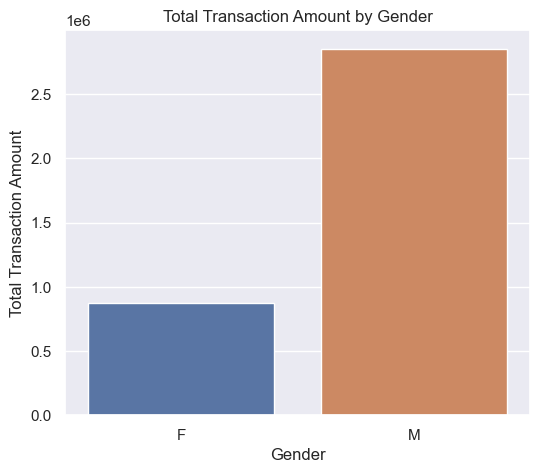

 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest account balance 
            14. Group transactions by location and total transaction amou

Enter your choice: 9
TransctionID: T207
Amount: 137890.0
 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest account balance 
            14. 

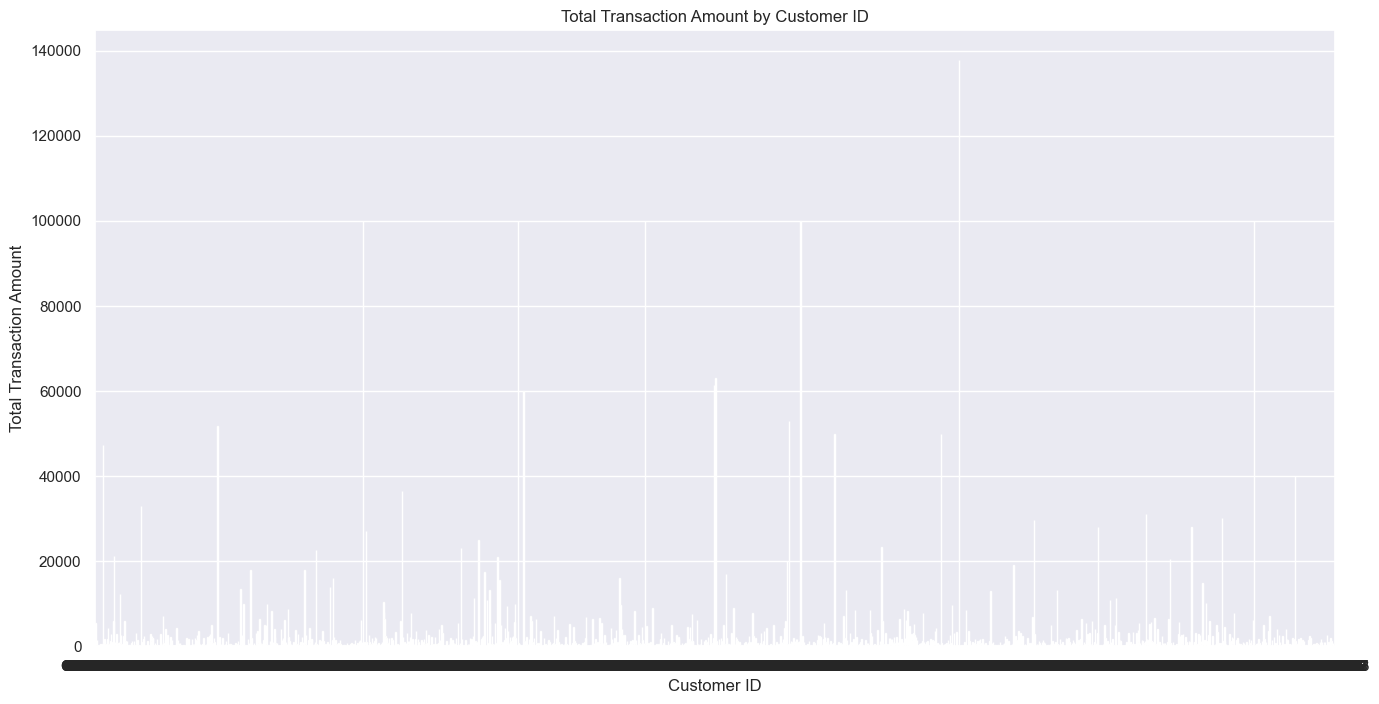

 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest account balance 
            14. Group transactions by location and total transaction amou

Enter your choice: 13
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|        CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+--------------------+------------------+---------------+---------------+-----------------+----+
|       T1419|  C5717433|   1/1/1800|         F|              MOHALI|     1.413119502E7|     21-10-2016|         204645|           2411.0|null|
|       T2002|  C7728829| 27-10-1980|         M|              MUMBAI|        3659161.33|     21-10-2016|         204521|           5997.0|null|
|       T1058|  C5442656| 02-01-1986|         M|              BOKARO|         3482113.5|     21-10-2016|         205137|           5500.0|null|
|        T526|  C5072857|   1/1/1800|         M|           NEW DELHI|        3053688.58|     21-10-2016|         2

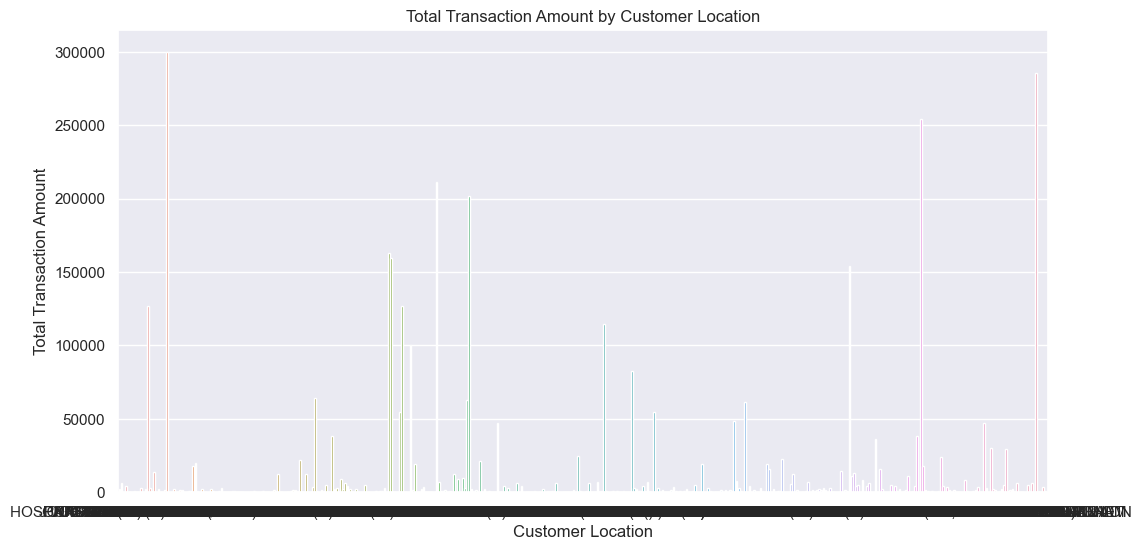

 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest account balance 
            14. Group transactions by location and total transaction amou

Enter your choice: 17
+----------+--------------------+------------------+
|CustomerID|        CustLocation|CustAccountBalance|
+----------+--------------------+------------------+
|  C1536588|            ITANAGAR|           53609.2|
|  C6121429|NO 3 KALYANI NAGA...|           2934.22|
|  C7018081|WAYS PANCHKUVA AH...|            143.07|
|  C5338459|             DHANBAD|         113238.74|
|  C5120181|             MUKTSAR|           2477.42|
|  C5838935|             SOCORRO|           58406.7|
|  C7923455|ANDHERI (EAST) MU...|           5810.82|
|  C1289591|                KOTA|         282455.64|
|  C7542443|      K V RANGAREDDY|          25222.91|
|  C6427687|       MUZAFFARNAGAR|           2162.36|
|  C3932235|        SHAHJAHANPUR|             91.66|
|  C7415323|  DIST RAIGAD PANVEL|          10253.21|
|  C6730370|               GODDA|          13968.07|
|  C8932791|    REWARI (HARYANA)|           5511.73|
|  C5930363|              ADIPUR|              2.75|
|  C8640537|            

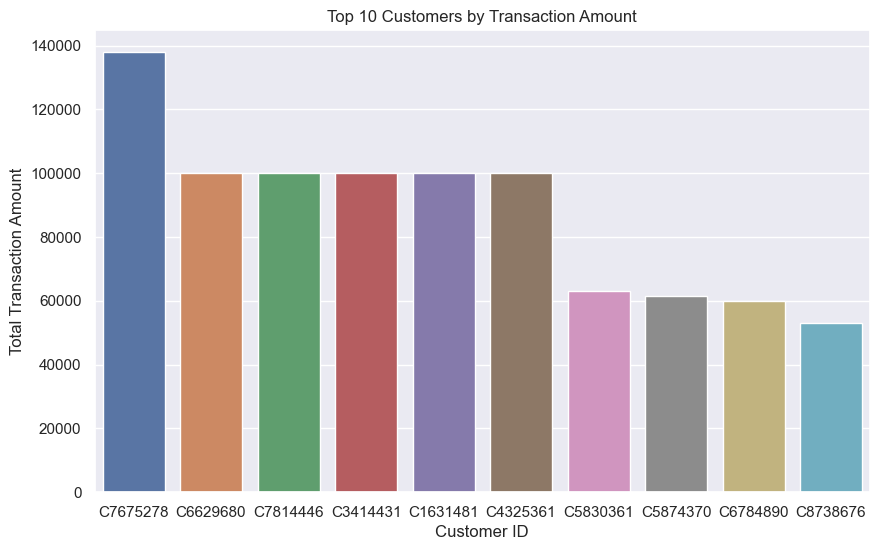

 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest account balance 
            14. Group transactions by location and total transaction amou

In [42]:
##### import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
import getpass

spark=SparkSession.builder.appName('demo').getOrCreate() 
bank_data=spark.read.csv("bank_segdata.csv",inferSchema=True,header=True)


def run_query(query_number):
    if query_number == 1:
        df.filter((df["CustAccountBalance"]>500) & (df["TransactionAmount"]<50000)).show()
        run()
    
    elif query_number == 2:
        df.filter(df["CustGender"] == "F").selectExpr("avg(CustAccountBalance)").show() 
        run()
    
    elif query_number == 3:
        result = df.filter((df["CustGender"]=="F") & (df["CustLocation"]=="CHENNAI")).show() 
        run()
    
    elif query_number == 4:
        import matplotlib.pyplot as plt
        from pyspark.sql.functions import sum
        total_transactions = bank_data.groupBy("CustGender").agg(sum("TransactionAmount").alias("total_transaction_amount")).toPandas()
        print(total_transactions.head())

        sn.set(rc={'figure.figsize':(6,5)})
        sn.barplot(data=total_transactions, x='CustGender', y='total_transaction_amount')
        plt.title('Total Transaction Amount by Gender')
        plt.xlabel('Gender')
        plt.ylabel('Total Transaction Amount')
        plt.show()
        run()

    
    elif query_number == 5:
        from pyspark.sql.functions import max

        highest_transactions = df.filter(df["CustLocation"] == "MUMBAI") \
                             .groupBy("TransactionDate") \
                             .agg(max("TransactionAmount").alias("HighestTransactionAmount"))

        highest_transactions.show()
        run()
    
    elif query_number == 6:
        df.select("TransactionAmount").agg({"TransactionAmount": "avg"}).show()
        run()
    
    elif query_number == 7:
        df.select("TransactionAmount").agg({"TransactionAmount": "max"}).show() 
        run()
    
    elif query_number == 8:
        df.select("TransactionAmount").agg({"TransactionAmount": "min"}).show()
        run()
    
    elif query_number == 9:
        from pyspark.sql.functions import desc


        sorted_transactions = df.sort(desc("TransactionAmount"))


        highest_transaction = sorted_transactions.first()
        print("TransctionID:", highest_transaction.TransctionID)
        print("Amount:", highest_transaction.TransactionAmount)
        run()
 
    
    elif query_number == 10:
        import matplotlib.pyplot as plt

        from pyspark.sql.functions import sum
        total_transactions = bank_data.groupBy("CustomerID").agg(sum("TransactionAmount").alias("total_transaction_amount")).toPandas()
        print(total_transactions.head())

        sn.set(rc={'figure.figsize':(16,8)})
        sn.barplot(data=total_transactions, x='CustomerID', y='total_transaction_amount')
        plt.title('Total Transaction Amount by Customer ID')
        plt.xlabel('Customer ID')
        plt.ylabel('Total Transaction Amount')
        plt.show()
        run()
    
    elif query_number == 11:
        from pyspark.sql.functions import col


        count = df.filter(col("TransactionDate") == "21-10-2016").show()
        run()
    
    elif query_number == 12:
        from pyspark.sql.functions import col, sum


        filtered_transactions_df = df.filter(col("TransactionDate").between("03-08-2016", "21-10-2016"))


        filtered_transactions_df.show()
        run()
    
    elif query_number == 13:
        df.orderBy("CustAccountBalance", ascending=False).show()
        run()
    
    elif query_number == 14:
        import matplotlib.pyplot as plt
        from pyspark.sql.functions import sum
        total_transactions = bank_data.groupBy("CustLocation").agg(sum("TransactionAmount").alias("total_transaction_amount")).toPandas()
        print(total_transactions.head())

        sn.set(rc={'figure.figsize':(12,6)})
        sn.barplot(data=total_transactions, x='CustLocation', y='total_transaction_amount')
        plt.title('Total Transaction Amount by Customer Location')
        plt.xlabel('Customer Location')
        plt.ylabel('Total Transaction Amount')
        plt.show()
        run()
    
    elif query_number == 15:
        df.groupBy("CustLocation").agg({"TransactionAmount": "sum", "TransctionID": "count"}).show()
        run()
    
    elif query_number == 16:
        from pyspark.sql.functions import col, sum

        filtered_transactions_df = df.filter(col("TransactionTime").between("52256", "183144"))


        filtered_transactions_df.show()


        customer_balances_df = filtered_transactions_df.groupBy("CustomerID")\
            .agg(sum("TransactionAmount").alias("TotalTransactionAmount"))\
            .join(df.select("CustomerID", "CustAccountBalance"), on="CustomerID", how="left")\
            .withColumn("CustomerBalance", col("CustAccountBalance") + col("TotalTransactionAmount"))

        customer_balances_df.show()
        run()

    elif query_number == 17:                                                                     

        df.createOrReplaceTempView("transactions")
        spark.sql("SELECT t1.CustomerID, t1.CustLocation, t1.CustAccountBalance FROM transactions t1 INNER JOIN (SELECT CustLocation, MAX(CustAccountBalance) AS MaxBalance FROM transactions GROUP BY CustLocation) t2 ON t1.CustLocation = t2.CustLocation AND t1.CustAccountBalance = t2.MaxBalance").show()
        run()
        
    elif query_number == 18:
        spark.sql("SELECT t1.* FROM transactions t1 INNER JOIN (SELECT CustomerID, AVG(TransactionAmount) AS AvgAmount FROM transactions GROUP BY CustomerID) t2 ON t1.CustomerID = t2.CustomerID WHERE t1.TransactionAmount > t2.AvgAmount").show() 
        run()
        
    elif query_number == 19:
        import matplotlib.pyplot as plt
        from pyspark.sql.functions import desc

        
        top_10_customers = df.groupBy("CustomerID").agg({"TransactionAmount": "sum"}) \
                            .orderBy(desc("sum(TransactionAmount)")).limit(10) \
                            .toPandas()
        print(top_10_customers.head())

        sn.set(rc={'figure.figsize':(10,6)})
        sn.barplot(data=top_10_customers, x='CustomerID', y='sum(TransactionAmount)')
        plt.title('Top 10 Customers by Transaction Amount')
        plt.xlabel('Customer ID')
        plt.ylabel('Total Transaction Amount')
        plt.show()
        run()

    else:
        print("Invalid choice")  
        
def run():
    
    print(''' 
            1.Number of customers with balance > 500 and transaction amount < 50000: 
            2. Average account balance of female customers: 
            3. Female customers located in Chennai: 
            4. Group customers by gender and show the total transaction amount for each group 
            5. The highest transaction amount for each day in Mumbai 
            6. The average transaction amount for all transactions 
            7. The highest transaction amount 
            8. The lowest transaction amount 
            9. The customer with the highest transaction amount 
            10. Group customers by ID and show the total transaction amount for each group 
            11. T1ransactions made on a specific date (e.g. "21-10-2016") 
            12. Balance of each customer on a specific date range (e.g. "03-08-2016" to "21-10-2016") 
            13. The customers with the highest account balance 
            14. Group transactions by location and total transaction amount for each group 
            15. Group transactions by location and the total transaction amount and count for each group 
            16. Balance of each customer during a specific time range (e.g. "52256" to "183144") 
            17. Maximum customer balance for each location 
            18.Customers who have made transactions larger than their average transaction amoun1t 
            19.The top 10 customers with the highest TransactionAmount

            20. Exit   ''')

    query_number= int(input("Enter your choice: "))
       
    run_query(query_number)
        

username = "Team_titans"
pswd = "Titans@21"

def login():
    a=input("enter the user name: ")
    b=getpass.getpass(prompt="Enter your password:")
    if username==a and pswd==b:
        print("Logged in Successfully")
        run()
        
        
        
    else:
        print("Invalid User Name Or Password ")
        login()
login()
    
    
    
    
    
    


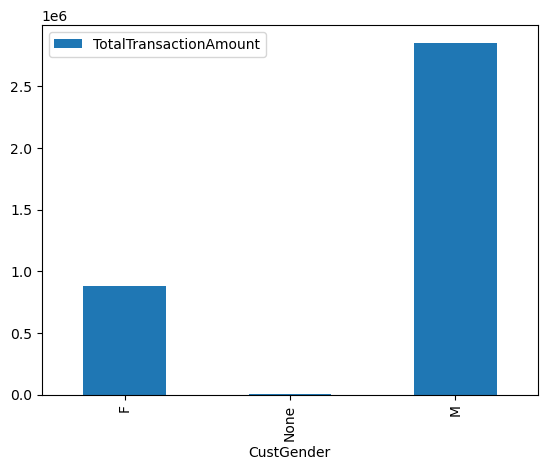

In [24]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Load the data into a Spark DataFrame
df = spark.read.csv("bank_segdata.csv", header=True, inferSchema=True)

# Group the data by CustGender and calculate the Total TransactionAmount
result = df.groupBy("CustGender") \
           .agg(F.sum("TransactionAmount").alias("TotalTransactionAmount"))

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = result.toPandas()

# Plot the data using a bar chart
pandas_df.plot(kind="bar", x="CustGender", y="TotalTransactionAmount")
plt.show()


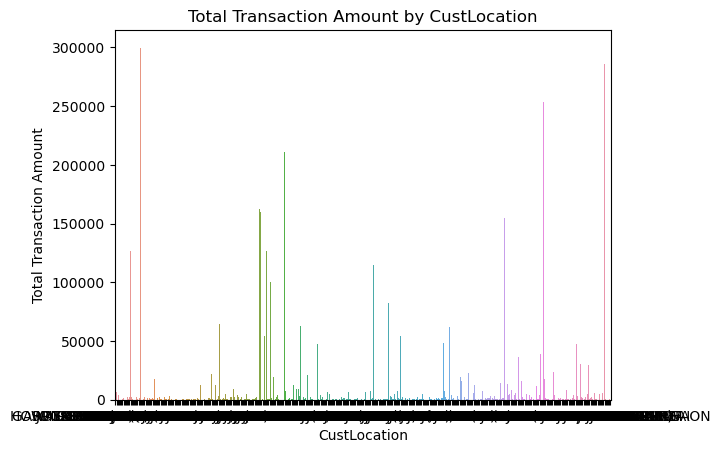

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import sum

# Load the data into a Spark DataFrame
df = spark.read.csv('bank_segdata.csv', header=True, inferSchema=True)

# Group the data by CustLocation and calculate the sum of TransactionAmount
total_amount_by_location = df.groupBy('CustLocation') \
                             .agg(sum('TransactionAmount').alias('TotalTransactionAmount'))

# Convert the result into a Pandas DataFrame
df_pandas = total_amount_by_location.toPandas()

# Use Seaborn to create the plot
sns.barplot(x='CustLocation', y='TotalTransactionAmount', data=df_pandas)

# Set the plot title and axis labels
plt.title('Total Transaction Amount by CustLocation')
plt.xlabel('CustLocation')
plt.ylabel('Total Transaction Amount')

# Display the plot
plt.show()


In [ ]:
# 19 Find the top 10 customers with the highest custaccountbalance
# from pyspark.sql.functions import desc

# top_10_customers = df.orderBy(desc("CustAccountBalance")).limit(10)
# top_10_customers.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv("bank_segdata.csv")

In [18]:
df.printSchema()


root
 |-- TransctionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,: string (nullable = true)



In [56]:
from pyspark.sql.functions import col,isnan,when,count
df2 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df2.show()

+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|TransctionID|CustomerID|CustomerDOB|CustGender|CustLocation|CustAccountBalance|TransactionDate|TransactionTime|TransactionAmount| _c9|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+
|           0|         0|          2|         1|           0|                 2|              0|              0|                0|2006|
+------------+----------+-----------+----------+------------+------------------+---------------+---------------+-----------------+----+



Text(0.5, 1.0, 'jk')

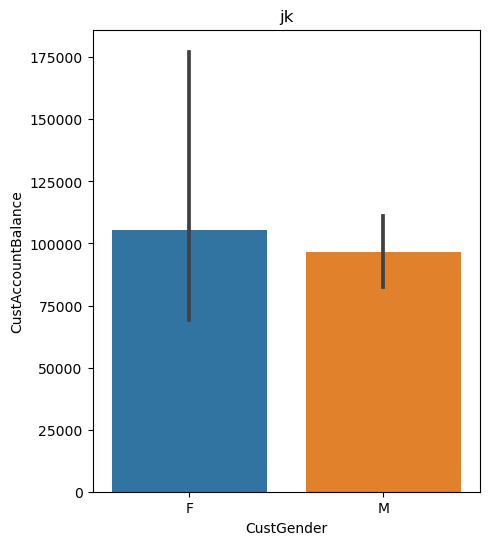

In [9]:
import findspark
findspark.init()
import pyspark
import pandas
import matplotlib.pyplot as plt
import seaborn as sb
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *
df = spark.read.csv("bank_segdata.csv", inferSchema = True,header = True)
pandas_df=df.toPandas()
plt.figure(figsize = (5,6))
sb.barplot(x="CustGender", y="CustAccountBalance", data=pandas_df)
plt.title("jk")

  CustGender  total_transaction_amount
0          F                 877278.52
1       None                   3449.00
2          M                2855457.66


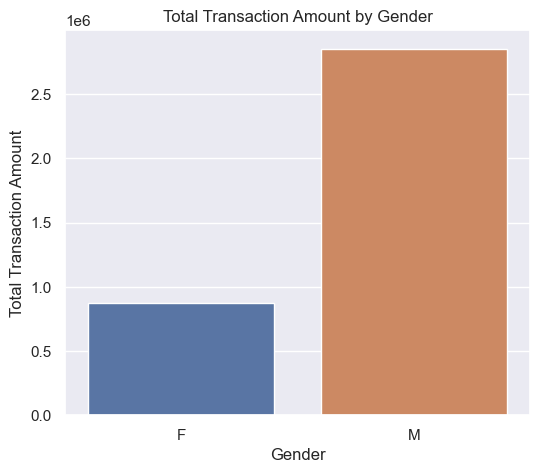

In [14]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

spark=SparkSession.builder.appName('demo').getOrCreate() 
bank_data=spark.read.csv("bank_segdata.csv",inferSchema=True,header=True)

total_transactions = bank_data.groupBy("CustGender").agg(sum("TransactionAmount").alias("total_transaction_amount")).toPandas()
print(total_transactions.head())

sn.set(rc={'figure.figsize':(6,5)})
sn.barplot(data=total_transactions, x='CustGender', y='total_transaction_amount')
plt.title('Total Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Transaction Amount')
plt.show()


  CustomerID  total_transaction_amount
0   C8732711                   1423.00
1   C6421261                   5555.00
2   C2939112                    321.00
3   C8741166                   1512.75
4   C4440931                    200.00


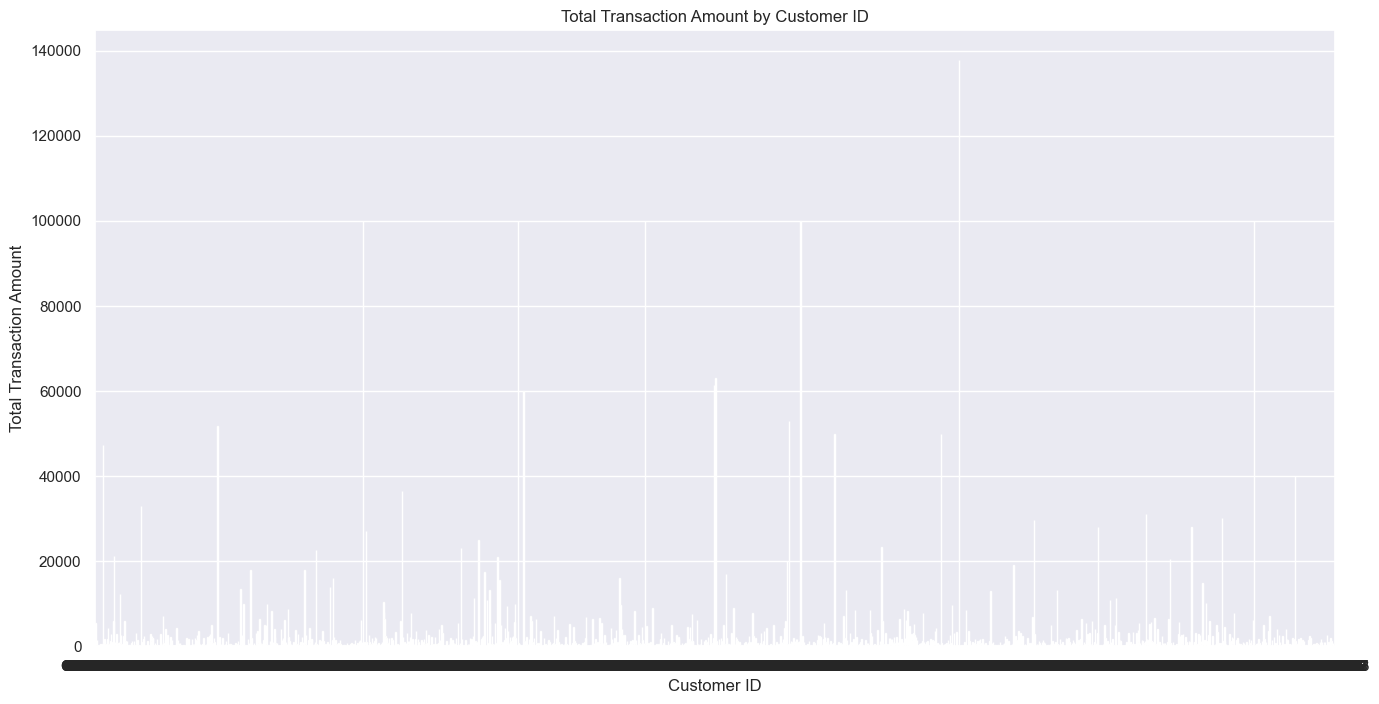

In [44]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

spark=SparkSession.builder.appName('demo').getOrCreate() 
bank_data=spark.read.csv("bank_segdata.csv",inferSchema=True,header=True)

total_transactions = bank_data.groupBy("CustomerID").agg(sum("TransactionAmount").alias("total_transaction_amount")).toPandas()
print(total_transactions.head())

sn.set(rc={'figure.figsize':(16,8)})
sn.barplot(data=total_transactions, x='CustomerID', y='total_transaction_amount')
plt.title('Total Transaction Amount by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.show()


       CustLocation  total_transaction_amount
0           GWALIOR                    2350.0
1            BOKARO                    6335.0
2          KALYAN W                     137.7
3  KALYAN (W) THANE                    3943.0
4        RAI BARELI                      50.0


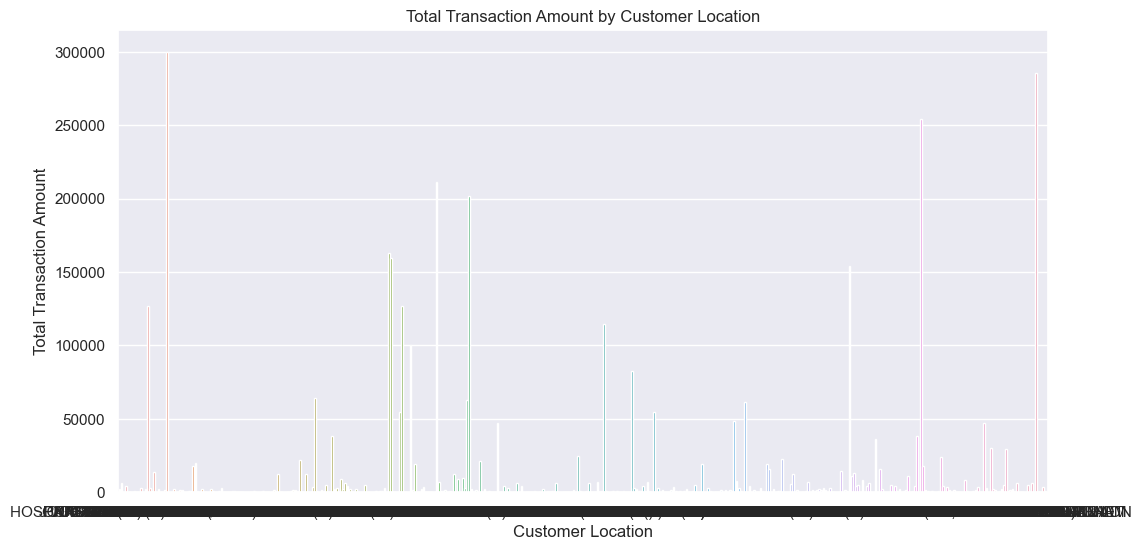

In [45]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

spark=SparkSession.builder.appName('demo').getOrCreate() 
bank_data=spark.read.csv("bank_segdata.csv",inferSchema=True,header=True)

total_transactions = bank_data.groupBy("CustLocation").agg(sum("TransactionAmount").alias("total_transaction_amount")).toPandas()
print(total_transactions.head())

sn.set(rc={'figure.figsize':(12,6)})
sn.barplot(data=total_transactions, x='CustLocation', y='total_transaction_amount')
plt.title('Total Transaction Amount by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Total Transaction Amount')
plt.show()


  CustomerID  sum(TransactionAmount)
0   C7675278                137890.0
1   C6629680                100000.0
2   C7814446                100000.0
3   C3414431                100000.0
4   C1631481                100000.0


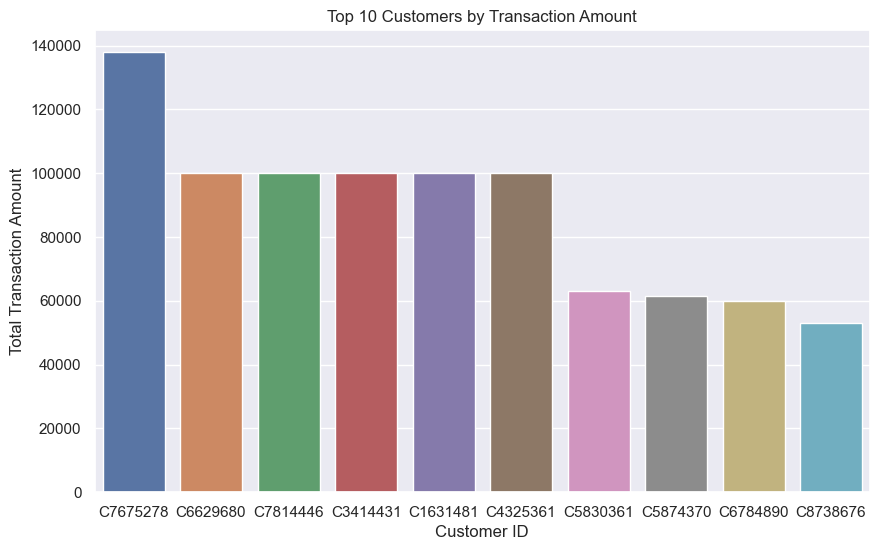

In [47]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import desc
from pyspark.sql.types import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

spark=SparkSession.builder.appName('demo').getOrCreate() 
df=spark.read.csv("bank_segdata.csv",inferSchema=True,header=True)

top_10_customers = df.groupBy("CustomerID").agg({"TransactionAmount": "sum"}) \
                    .orderBy(desc("sum(TransactionAmount)")).limit(10) \
                    .toPandas()
print(top_10_customers.head())

sn.set(rc={'figure.figsize':(10,6)})
sn.barplot(data=top_10_customers, x='CustomerID', y='sum(TransactionAmount)')
plt.title('Top 10 Customers by Transaction Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.show()
